Importing libraries

In [1]:
#introducing libraries
!pip install numpy scipy pandas>1.0 matplotlib lmfit colour

In [2]:
#calling up libraries
from datetime import datetime
import pandas as pd
import numpy as np
import scipy
import scipy.integrate as integrate
from scipy.integrate import quad
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from mpl_toolkits import mplot3d
from datetime import timedelta
from lmfit.models import LorentzianModel
import statistics
from matplotlib.collections import LineCollection 
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap


Importing data from google drive folder, sorting each into absorbance, spectroscope runs, and general spectroscope data.

In [3]:
#import CSV data from drive
from google.colab import drive
import glob
import os
drive.mount('drive', force_remount=True)
folder = "/content/drive/MyDrive/Hydro Lab CSVs"
all_files = glob.glob(os.path.join(folder, '*.csv'))
Spec_data = {}
Sorb_data = {}
Irr_data = {}
titles = []

Mounted at drive


In [4]:
for filename in all_files:
  #Simplify name
  new_name = filename.replace(".csv", "").replace("/content/drive/MyDrive/Hydro Lab CSVs/","")
  if new_name == '2.0 bar action (1)':
    new_name = '2.0 bar action'
  #import data
  df = pd.read_csv(filename, sep=',', header=12)
  #Some cleaning
  df = df.drop(0,0)
  #get rid of bottom info rows
  df = df.dropna(thresh=3)
  #Get rid of first two columns
  #change strings to numbers

  titles.append(new_name)
  df.columns = ['Time Stamp (hh:mm:ss)', 'Torque (N*cm)', 'Pressure (bar)', 'Speed (rpm)', 'Flow (L/min)', 'P_mech (W)', 'P_hydro (W)', 'Efficiency (%)']
  df=df.apply(pd.to_numeric, errors='coerce')
  Spec_data[new_name] = df

Spec_data['2.0 bar action']['Pressure (bar)']











1     2.0438
2     2.0141
3     2.0042
4     2.0045
5     1.9956
6     1.9963
7     1.9948
8     2.0017
9     2.0029
10    2.0000
11    2.0030
12    1.9986
13    1.9984
14    1.9954
15    1.9942
16    2.0015
17    1.9999
Name: Pressure (bar), dtype: float64

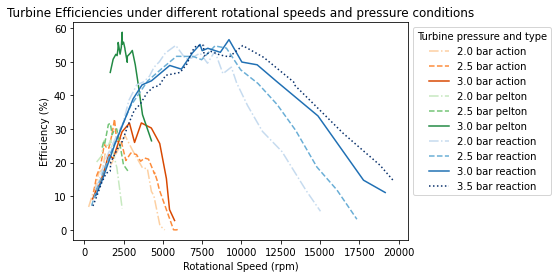

In [5]:
#adding relevant columns
styles = ['-.', '--', '-', ':']
for name in sorted(sorted(Spec_data), key=lambda n: n.split()[-1]):
  if 'reaction' in name:
    colomap = cm.get_cmap('Blues')
  elif ' action' in name:
    colomap = cm.get_cmap('Oranges')
  elif 'pelton' in name:
    colomap = cm.get_cmap('Greens')
  plt.plot(np.asarray(Spec_data[name]['Speed (rpm)']), np.asarray(Spec_data[name]['Efficiency (%)']), label=name, color=colomap((float(name[0:3])-1.5)/2), linestyle=styles[int(((float(name[0:3])-2)/.5))])
plt.legend(title='Turbine pressure and type', bbox_to_anchor=(1,1), loc="upper left")
plt.xlabel('Rotational Speed (rpm)')
plt.ylabel('Efficiency (%)')
plt.title('Turbine Efficiencies under different rotational speeds and pressure conditions')
plt.show()

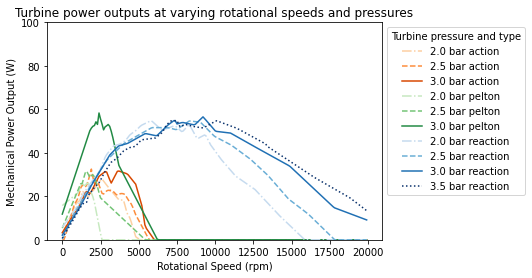

{'2.0 bar action':         0         100       200       300    ...  19600  19700  19800  19900
2.0  2.820537  4.319758  5.818979  7.318199  ...    0.0    0.0    0.0    0.0

[1 rows x 200 columns], '2.5 bar action':      0      100       200       300    ...  19600  19700  19800  19900
2.5    0.0    0.0  1.775362  4.244901  ...    0.0    0.0    0.0    0.0

[1 rows x 200 columns], '3.0 bar action':         0         100      200       300    ...  19600  19700  19800  19900
3.0  3.256834  4.402207  5.54758  6.692953  ...    0.0    0.0    0.0    0.0

[1 rows x 200 columns], '2.0 bar pelton':          0          100       200        300    ...  19600  19700  19800  19900
2.0  15.736117  16.309149  16.88218  17.455212  ...    0.0    0.0    0.0    0.0

[1 rows x 200 columns], '2.5 bar pelton':         0         100       200        300    ...  19600  19700  19800  19900
2.5  5.394018  7.093361  8.792703  10.492046  ...    0.0    0.0    0.0    0.0

[1 rows x 200 columns], '3.0 bar pelton':   

In [6]:
Spec_interp={}
I_data={}
for name in sorted(sorted(Spec_data), key=lambda n: n.split()[-1]):
  Spec_interp[name] = scipy.interpolate.interp1d(np.asarray(Spec_data[name]['Speed (rpm)']),np.asarray(Spec_data[name]['Efficiency (%)']), 'linear', fill_value='extrapolate')
  xnew = np.arange(0, 20000, 100)
  ynew = Spec_interp[name](xnew)
  if 'reaction' in name:
    colomap = cm.get_cmap('Blues')
  elif ' action' in name:
    colomap = cm.get_cmap('Oranges')
  elif 'pelton' in name:
    colomap = cm.get_cmap('Greens')
  ynew[ynew<0] = 0
  I_data[name] = pd.DataFrame(ynew.T, index=xnew, columns=[float(name[0:3])]).T
  plt.plot(xnew, ynew, label=name, color=colomap((float(name[0:3])-1.5)/2), linestyle=styles[int(((float(name[0:3])-2)/.5))])
plt.legend(title='Turbine pressure and type', bbox_to_anchor=(1,1), loc="upper left")
plt.ylim(0,100)
plt.xlabel('Rotational Speed (rpm)')
plt.ylabel('Mechanical Power Output (W)')
plt.title('Turbine power outputs at varying rotational speeds and pressures')
plt.show()
print(I_data)


In [7]:
dfp=pd.DataFrame()
dfr=pd.DataFrame()
dfn=pd.DataFrame()
for name in I_data:
  df = I_data[name]
  if ' action' in name:
    dfn = dfn.append(df, ignore_index=True)
  if 'reaction' in name:
    dfr = dfr.append(df, ignore_index=True)
  if 'pelton' in name:
    dfp = dfp.append(df, ignore_index=True)

print(dfp)
colorlist = []
for x in d:
  for y in ctoa:
    p2 = dfp.loc[x,y]
    r2 = dfr.loc[x,y]
    n2 = dfn.loc[x,y]
    if p2 < 0 or np.isnan(p2):
      p2 = 0
    if r2 < 0 or np.isnan(r2):
      r2 = 0
    if n2 < 0 or np.isnan(n2):
      n2 = 0
    sum = p2+r2+n2
    if sum != 0:
      colorlist.append([n2/sum, p2/sum, r2/sum])
    else:
      colorlist.append([0,0,0])



       0          100        200        300    ...  19600  19700  19800  19900
0  15.736117  16.309149  16.882180  17.455212  ...    0.0    0.0    0.0    0.0
1   5.394018   7.093361   8.792703  10.492046  ...    0.0    0.0    0.0    0.0
2  11.823118  13.951771  16.080424  18.209077  ...    0.0    0.0    0.0    0.0

[3 rows x 200 columns]


NameError: ignored

ValueError: ignored

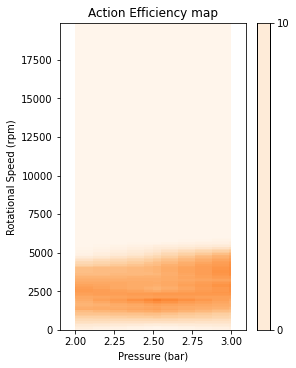

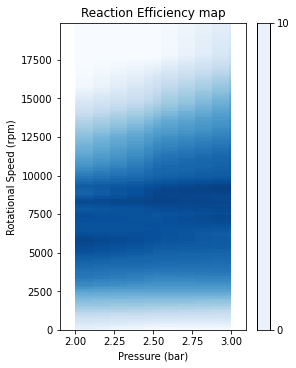

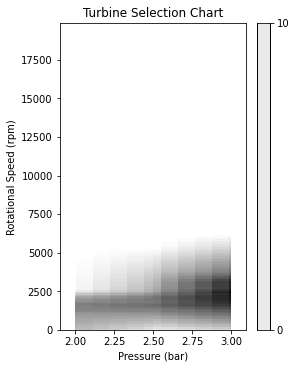

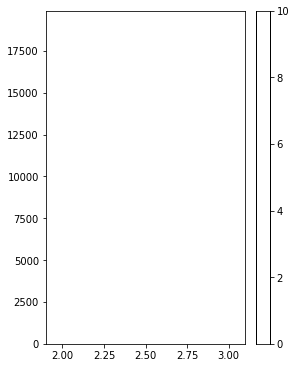

In [16]:
dfp=pd.DataFrame()
dfr=pd.DataFrame()
dfn=pd.DataFrame()
for name in I_data:
  df = I_data[name]
  if ' action' in name:
    dfn = dfn.append(df, ignore_index=True)
  if 'reaction' in name:
    dfr = dfr.append(df, ignore_index=True)
  if 'pelton' in name:
    dfp = dfp.append(df, ignore_index=True)
dfn.index = [2.0,2.5,3.0]
dfr.index = [2.0,2.5,3.0,3.5]
dfp.index = [2.0,2.5,3.0]
dfn = dfn.sort_index(axis=1)
dfr = dfr.sort_index(axis=1)
dfp = dfp.sort_index(axis=1)



viridis = cm.get_cmap('Oranges', 100)
def plot_examples(colormaps, data, name):
    """
    Helper function to plot data with associated colormap.
    """
    n = len(colormaps)
    fig, axs = plt.subplots(1, n, figsize=(n * 2 + 2, 5),
                            constrained_layout=True, squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data.index,data.columns, data.T, cmap=cmap, rasterized=True)
        fig.colorbar(psm, ax=ax, boundaries=[0,10])
        ax.title.set_text(name)

    plt.xlabel('Pressure (bar)')
    plt.ylabel('Rotational Speed (rpm)')   



dfr=dfr[dfr.index<=3.0]




idex = np.linspace(1.9, 3.1, 12)
for num in idex:
  if num not in [2.0, 2.5, 3.0]:
    dfp.loc[num] = np.nan
    dfn.loc[num] = np.nan
    dfr.loc[num] = np.nan
dfp = dfp.sort_index(axis=0)
dfp = dfp.interpolate(axis=0)
dfn = dfn.sort_index(axis=0)
dfn = dfn.interpolate(axis=0)
dfr = dfr.sort_index(axis=0)
dfr = dfr.interpolate(axis=0)
dfp.iloc[-2:-1] = np.nan
dfr.iloc[-2:-1] = np.nan
dfn.iloc[-2:-1] = np.nan
#https://www.analyticsvidhya.com/blog/2020/09/colormaps-matplotlib/
newcmp = ListedColormap(viridis(np.linspace(0, dfn.max().max()/60, 100)))

plot_examples([newcmp], dfn, 'Action Efficiency map')
viridis = cm.get_cmap('Blues', 100)
newcmp = ListedColormap(viridis(np.linspace(0, dfr.max().max()/60, 100)))
plot_examples([newcmp], dfr, 'Reaction Efficiency map')
viridis = cm.get_cmap('binary', 100)
newcmp = ListedColormap(viridis(np.linspace(0, dfp.max().max()/60, 100)))
plot_examples([newcmp], dfp, 'Turbine Selection Chart')
viridis = cm.get_cmap('binary', 100)


newcmp = ListedColormap(viridis(np.linspace(0, 0/75, 100)))
plot_examples([newcmp], blank, 'Turbine Selection Chart')



    

In [ ]:
ny, nx = 2, 3
r, g, b = [np.random.random(ny*nx).reshape((ny, nx)) for _ in range(3)]
print(r[0])


[0.43706542 0.6836647  0.42839289]


In [ ]:
def color_choice(x, y):
  a = frames_p[int((x-2)/.5)](y)
  b = frames_r[int((x-2)/.5)](y)
  c = frames_a[int((x-2)/.5)](y)
  if max(a,b,c) == a:
    return 'green'
  elif max(a,b,c) == b:
    return 'blue'
  elif max(a,b,c) == c:
    return 'orange'

X = np.arange(2, 3.5, 0.5)
Y = np.arange(1000, 20000, 200)
x,y = np.meshgrid(X, Y)
f2 = np.vectorize(color_choice)
plt.imshow(color_choice)


array([['green', 'green', 'green'],
       ['green', 'green', 'green'],
       ['green', 'green', 'green'],
       ['green', 'green', 'green'],
       ['blue', 'green', 'green'],
       ['blue', 'green', 'green'],
       ['blue', 'green', 'green'],
       ['blue', 'blue', 'green'],
       ['blue', 'blue', 'green'],
       ['blue', 'blue', 'green'],
       ['blue', 'blue', 'green'],
       ['blue', 'blue', 'green'],
       ['blue', 'blue', 'green'],
       ['blue', 'blue', 'blue'],
       ['blue', 'blue', 'blue'],
       ['blue', 'blue', 'blue'],
       ['blue', 'blue', 'blue'],
       ['blue', 'blue', 'blue'],
       ['blue', 'blue', 'blue'],
       ['blue', 'blue', 'blue'],
       ['blue', 'blue', 'blue'],
       ['blue', 'blue', 'blue'],
       ['blue', 'blue', 'blue'],
       ['blue', 'blue', 'blue'],
       ['blue', 'blue', 'blue'],
       ['blue', 'blue', 'blue'],
       ['blue', 'blue', 'blue'],
       ['blue', 'blue', 'blue'],
       ['blue', 'blue', 'blue'],
       ['blue', 'bl